1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [ ]:
import math
from scipy.stats import poisson

observed_hurricanes = 15
average_hurricanes = 6.3

# Calculate the probability of observing 15 or more hurricanes in a single year
probability = 1 - poisson.cdf(observed_hurricanes - 1, average_hurricanes)

# Calculate the Z score
standard_deviation = math.sqrt(average_hurricanes)
z_score = (observed_hurricanes - average_hurricanes) / standard_deviation

# Check if the Z score is greater than or equal to 2
if z_score >= 2:
    print("The number of hurricanes in 2005 is significantly larger than other years!")
else:
    print("The number of hurricanes in 2005 is not significantly larger than other years.")

print("Probability:", probability)
print("Z score:", z_score)

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [ ]:
import numpy as np
from scipy import stats

# Input data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

# Calculate the sample sigma
variance_pre = np.var(pre, ddof=1)
variance_post = np.var(post, ddof=1)

sigma = np.sqrt( (variance_pre + variance_post) / 2 )

# Calculate the T score
T = (np.mean(pre) - np.mean(post)) / (sigma * np.sqrt(2 / 10))

# Calculate the p-value
pval = stats.t.cdf(T, 9) + (1 - stats.t.cdf(-T, 9))

# Determine if the changes are statistically significant
alpha = 0.05  # significance level

if pval < alpha:
    print("The change in blood pressures is statistically significant!")
else:
    print("The change in blood pressures is not statistically significant.")


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def prediction(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# Two different arrays of integers
months = np.array(list(range(1, 13)))
max_temp = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Generate x-values for plotting
x = np.linspace(1, 12, 100)

# Generate coefficients for the polynomial fits
popt_max, _ = curve_fit(prediction, months, max_temp)
popt_min, _ = curve_fit(prediction, months, min_temp)

# Plot the original data points and the polynomial fits
plt.scatter(months, max_temp, color='red', label='Maximum temparatures')
plt.scatter(months, min_temp, color='blue', label='Minimum temperatures')
plt.plot(x, prediction(x, *popt_max), color='red', label='Polynomial Fit 1')
plt.plot(x, prediction(x, *popt_min), color='blue', label='Polynomial Fit 2')

# Add labels and legend to the plot
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.legend()

# Show the plot
plt.show()

# Goodness of Fit
SSR_max = np.sum((max_temp - prediction(months, *popt_max)) ** 2)
TSS_max = np.sum((max_temp - np.mean(max_temp)) ** 2)

R2_max = 1 - ( SSR_max / TSS_max )
print("Goodness of Fit says that our prediction on max is %.2f%% accurate" % (np.sqrt(R2_max) * 100))

SSR_min = np.sum((min_temp - prediction(months, *popt_min)) ** 2)
TSS_min = np.sum((min_temp - np.mean(min_temp)) ** 2)

R2_min = 1 - ( SSR_min / TSS_min )
print("Goodness of Fit says that our prediction on min is %.2f%% accurate" % (np.sqrt(R2_min) * 100))

# I think the fitting is reasonable

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

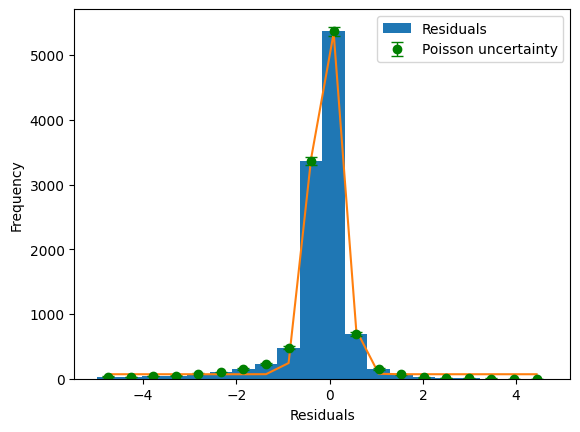

The p-value of the fit is: 4.244714434985942e-237
The fit function seems to be a good match for the data.


In [5]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

# Read the data from the file
with open('data/residuals_261.pkl', "rb") as file:
    data = pickle.load(file).item()

# Extract the 'residual' feature
residuals = data['residuals'][abs(data["residuals"]) < 5]

# Create the histogram
n, bin_edges, _ = plt.hist(residuals, bins=20, density=False, label='Residuals')

# Calculate Poisson uncertainties
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
poisson_uncertainties = np.sqrt(n)

plt.errorbar(bin_centers, n, yerr=poisson_uncertainties, fmt='o', c='g', linewidth=1, capsize=4, label= "Poisson uncertainty")

# Plot the histogram with uncertainties
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()

# Define an appropriate function to fit the histogram
def gaussian(x, amplitude, mean, stddev, offset):
    return offset + amplitude * np.exp(-0.5 * ((x - mean) / stddev)**2)

# Fit the function to the histogram
popt, _ = curve_fit(gaussian, bin_centers, n)

# Calculate and plot the predicted values
expected_n = gaussian(bin_centers, *popt)
plt.plot(bin_centers, expected_n)
plt.show()

# Calculate the chi-square value
_, p_value = stats.chisquare(n, expected_n)

# Print the p-value and assess the appropriateness of the fit function
print(f"The p-value of the fit is: {p_value}")
if p_value > 0.05:
    print("It seems that the fit function may not be appropriate for the data.")
else:
    print("The fit function seems to be a good match for the data.")

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

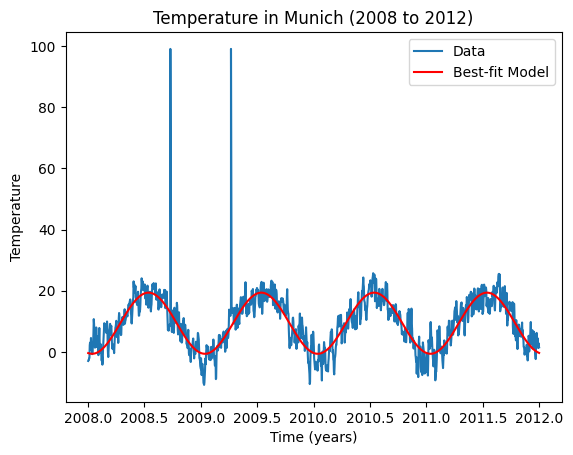

Best-fit values of the parameters:
a = -9.988133676460334 +/- 0.17961047339328393
b = 12.333023014281954 +/- 0.017983052421178765
c = 9.384114874727588 +/- 0.12700529104206215

Overall average temperature in Munich: 8.94 °C
Typical daily average temperature for the coldest time of year: -0.60 °C
Typical daily average temperature for the hottest time of year: 19.37 °C


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function to fit
def model(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

# Load the data from the file
data = np.loadtxt("data/munich_temperatures_average_with_bad_data.txt")

# Extract the time and temperature values
time = data[:, 0]
temperature = data[:, 1]

# Define the range for the plot
start_year = 2008
end_year = 2012

# Find the indices corresponding to the range
start_index = np.where(time >= start_year)[0][0]
end_index = np.where(time <= end_year)[0][-1]

# Trim the data to the desired range
time_range = time[start_index: end_index + 1]
temperature_range = temperature[start_index: end_index + 1]

# Perform the curve fitting
popt, pcov = curve_fit(model, time_range, temperature_range)

# Extract the best-fit parameters and their uncertainties
a_fit, b_fit, c_fit = popt
a_err, b_err, c_err = np.sqrt(np.diag(pcov))

# Calculate the overall average temperature
average_temperature = np.mean(temperature)

# Calculate the predicted temperatures for the coldest and hottest time of year
coldest_time = np.argmin(model(time_range, a_fit, b_fit, c_fit))
hottest_time = np.argmax(model(time_range, a_fit, b_fit, c_fit))
coldest_temperature = model(time_range[coldest_time], a_fit, b_fit, c_fit)
hottest_temperature = model(time_range[hottest_time], a_fit, b_fit, c_fit)

# Plot the data and the best-fit model
plt.plot(time_range, temperature_range, label='Data')
plt.plot(time_range, model(time_range, a_fit, b_fit, c_fit), 'r-', label='Best-fit Model')
plt.xlabel('Time (years)')
plt.ylabel('Temperature')
plt.title('Temperature in Munich (2008 to 2012)')
plt.legend()
plt.show()

# Print the results
print("Best-fit values of the parameters:")
print("a =", a_fit, "+/-", a_err)
print("b =", b_fit, "+/-", b_err)
print("c =", c_fit, "+/-", c_err)
print()
print("Overall average temperature in Munich: %.2f °C" % average_temperature)
print("Typical daily average temperature for the coldest time of year: %.2f °C" % coldest_temperature)
print("Typical daily average temperature for the hottest time of year: %.2f °C" % hottest_temperature)

# The parameter 'b' in the function represents the phase shift of the cosine wave.
# It determines the starting point of the oscillation. In the context of temperature,
# it could correspond to the time of year when the temperature reaches its maximum or minimum. 